In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error


plt.style.use('seaborn')


In [5]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   id             21597 non-null  int64        
 1   date           21597 non-null  object       
 2   price          21597 non-null  float64      
 3   bedrooms       21597 non-null  int64        
 4   bathrooms      21597 non-null  float64      
 5   sqft_living    21597 non-null  int64        
 6   sqft_lot       21597 non-null  int64        
 7   floors         21597 non-null  float64      
 8   waterfront     19221 non-null  object       
 9   view           21534 non-null  object       
 10  condition      21597 non-null  object       
 11  grade          21597 non-null  object       
 12  sqft_above     21597 non-null  int64        
 13  sqft_basement  21597 non-null  object       
 14  yr_built       21597 non-null  int64        
 15  yr_renovated   17755 non-null  float

In [7]:
df3 = pd.read_csv('data/WASTHPI.csv')
df3['quarter'] = pd.PeriodIndex(df3.DATE, freq='Q')
df3

,DATE,WASTHPI_CHG,quarter
0,1975-04-01,0.95,1975Q2
1,1975-07-01,2.53,1975Q3
2,1975-10-01,-1.66,1975Q4
3,1976-01-01,2.28,1976Q1
4,1976-04-01,3.28,1976Q2
...,...,...,...
184,2021-04-01,56.72,2021Q2
185,2021-07-01,46.23,2021Q3
186,2021-10-01,28.10,2021Q4
187,2022-01-01,38.76,2022Q1


In [8]:
df_master = df.merge(df3, on = 'quarter' )
df_master

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014Q4,2014-10-01,4.34
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014Q4,2014-10-01,4.34
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014Q4,2014-10-01,4.34
3,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,NO,NONE,...,1977,0.0,98074,47.6127,-122.045,1370,10208,2014Q4,2014-10-01,4.34
4,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,1921,0.0,98002,47.3089,-122.210,1060,5095,2014Q4,2014-10-01,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3832050760,8/28/2014,270000.0,3,2.50,1870,5000,2.0,NO,NONE,...,2009,0.0,98042,47.3339,-122.055,2170,5399,2014Q3,2014-07-01,9.28
21593,7570050450,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,NONE,...,2010,0.0,98038,47.3452,-122.022,2540,4571,2014Q3,2014-07-01,9.28
21594,7502800100,8/13/2014,679950.0,5,2.75,3600,9437,2.0,NO,NONE,...,2014,0.0,98059,47.4822,-122.131,3550,9421,2014Q3,2014-07-01,9.28
21595,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,2003,NaN,98053,47.6857,-122.046,3370,6814,2014Q3,2014-07-01,9.28


In [9]:
df_master['year'] = pd.PeriodIndex(df_master.date, freq='Y')
#df_preds2 = df_preds1.drop(['quarter','year','date','zipcode','price'], axis =1)
df_master_no_object = df_master.drop(['year', 'quarter','date'], axis = 1)

In [36]:
df4 = pd.read_csv('data/ACSST5Y2015.S1903-Data.csv')
df4 = df4[['NAME','S1903_C02_001E']]
df4

,NAME,S1903_C02_001E
0,Geographic Area Name,Median income (dollars)!!Estimate!!Households
1,ZCTA5 98001,71555
2,ZCTA5 98002,45078
3,ZCTA5 98003,46250
4,ZCTA5 98004,102374
...,...,...
595,ZCTA5 99371,56250
596,ZCTA5 99401,59676
597,ZCTA5 99402,53780
598,ZCTA5 99403,43711


In [37]:
df4['NAME'] = df4.NAME.str.split(' ').str[1]
df4 = df4.drop([0, 599])
df4['year'] = '2015'
df4=df4.rename(columns={"NAME": "zipcode"})
df4.columns

Index(['zipcode', 'S1903_C02_001E', 'year'], dtype='object')

In [38]:
df_master.zipcode = df_master.zipcode.astype(str)
df_master.year = df_master.year.astype(str)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   id             21597 non-null  int64        
 1   date           21597 non-null  object       
 2   price          21597 non-null  float64      
 3   bedrooms       21597 non-null  int64        
 4   bathrooms      21597 non-null  float64      
 5   sqft_living    21597 non-null  int64        
 6   sqft_lot       21597 non-null  int64        
 7   floors         21597 non-null  float64      
 8   waterfront     19221 non-null  object       
 9   view           21534 non-null  object       
 10  condition      21597 non-null  object       
 11  grade          21597 non-null  object       
 12  sqft_above     21597 non-null  int64        
 13  sqft_basement  21597 non-null  object       
 14  yr_built       21597 non-null  int64        
 15  yr_renovated   17755 non-null  float

In [39]:
df_income_2015 = df_master.merge(df4, on = ['zipcode','year'])
df_income_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG,year,S1903_C02_001E
0,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,2015Q1,2015-01-01,5.95,2015,90588
1,1088650310,1/27/2015,530000.0,4,2.50,2320,5493,2.0,NO,NONE,...,98028,47.7727,-122.229,2450,5471,2015Q1,2015-01-01,5.95,2015,90588
2,4140090320,3/20/2015,595000.0,5,2.75,3740,6750,1.0,NO,NONE,...,98028,47.7679,-122.261,2620,7920,2015Q1,2015-01-01,5.95,2015,90588
3,5634500251,3/27/2015,450000.0,3,1.00,1160,36831,1.0,NO,NONE,...,98028,47.7507,-122.237,1800,15640,2015Q1,2015-01-01,5.95,2015,90588
4,7297700055,3/5/2015,306000.0,3,1.00,1190,10350,1.0,NO,NONE,...,98028,47.7428,-122.244,1850,10500,2015Q1,2015-01-01,5.95,2015,90588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,9320990140,4/22/2015,339950.0,3,2.50,1730,4286,2.0,NO,NONE,...,98148,47.4320,-122.329,1780,4343,2015Q2,2015-04-01,13.08,2015,46871
6971,9323000010,4/16/2015,415000.0,4,2.50,2670,8279,2.0,NO,NONE,...,98148,47.4292,-122.328,2290,7504,2015Q2,2015-04-01,13.08,2015,46871
6972,3223049073,4/13/2015,235000.0,2,1.00,930,10505,1.0,NaN,NONE,...,98148,47.4337,-122.329,1520,8881,2015Q2,2015-04-01,13.08,2015,46871
6973,6706000040,4/23/2015,330000.0,4,2.25,2000,10679,1.0,NO,NONE,...,98148,47.4238,-122.329,1650,8875,2015Q2,2015-04-01,13.08,2015,46871


In [40]:
df5 = pd.read_csv('data/ACSST5Y2014.S1903-Data.csv')
df5 = df5[['NAME','S1903_C02_001E']]
df5['NAME'] = df5.NAME.str.split(' ').str[1]
df5 = df5.drop([0, 599])
df5

,NAME,S1903_C02_001E
1,98001,72540
2,98002,44930
3,98003,45563
4,98004,100344
5,98005,85639
...,...,...
594,99363,-
595,99371,53000
596,99401,62396
597,99402,53438


In [41]:
df5['year'] = '2014'
df5=df5.rename(columns={"NAME": "zipcode"})
df5.columns

Index(['zipcode', 'S1903_C02_001E', 'year'], dtype='object')

In [42]:
df_income_2014 = df_master.merge(df5, on = ['zipcode','year'])
df_income_2014

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG,year,S1903_C02_001E
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,2014Q4,2014-10-01,4.34,2014,59637
1,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,98178,47.4897,-122.240,1020,7138,2014Q4,2014-10-01,4.34,2014,59637
2,561000075,12/31/2014,260000.0,3,1.00,1180,5350,1.5,NO,NONE,...,98178,47.5050,-122.259,1490,5350,2014Q4,2014-10-01,4.34,2014,59637
3,3352402236,12/15/2014,252500.0,3,2.00,1150,6000,1.0,NO,NONE,...,98178,47.4980,-122.263,1980,6360,2014Q4,2014-10-01,4.34,2014,59637
4,8069000075,12/29/2014,790000.0,4,1.75,2460,10061,1.0,YES,EXCELLENT,...,98178,47.5105,-122.238,2300,10061,2014Q4,2014-10-01,4.34,2014,59637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,2525049259,8/12/2014,2190000.0,4,4.50,4240,13162,2.0,NO,NONE,...,98039,47.6193,-122.229,3010,12163,2014Q3,2014-07-01,9.28,2014,182308
14618,3262300555,7/8/2014,2460000.0,4,5.25,6500,14986,2.0,NO,NONE,...,98039,47.6304,-122.236,2270,8119,2014Q3,2014-07-01,9.28,2014,182308
14619,3625049079,8/1/2014,1350000.0,3,2.00,2070,9600,1.0,NO,FAIR,...,98039,47.6160,-122.239,3000,16215,2014Q3,2014-07-01,9.28,2014,182308
14620,2525049263,7/9/2014,2680000.0,5,3.00,4290,20445,2.0,NaN,NONE,...,98039,47.6217,-122.239,3620,22325,2014Q3,2014-07-01,9.28,2014,182308


In [44]:
df_income = pd.concat([df_income_2014,df_income_2015], axis = 0)
df_income.S1903_C02_001E = df_income.S1903_C02_001E.astype(int)
df_income = df_income.reset_index().drop('index', axis=1)
df_income.quarter = df_income.quarter.astype(str)


df_income

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG,year,S1903_C02_001E
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,2014Q4,2014-10-01,4.34,2014,59637
1,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,98178,47.4897,-122.240,1020,7138,2014Q4,2014-10-01,4.34,2014,59637
2,561000075,12/31/2014,260000.0,3,1.00,1180,5350,1.5,NO,NONE,...,98178,47.5050,-122.259,1490,5350,2014Q4,2014-10-01,4.34,2014,59637
3,3352402236,12/15/2014,252500.0,3,2.00,1150,6000,1.0,NO,NONE,...,98178,47.4980,-122.263,1980,6360,2014Q4,2014-10-01,4.34,2014,59637
4,8069000075,12/29/2014,790000.0,4,1.75,2460,10061,1.0,YES,EXCELLENT,...,98178,47.5105,-122.238,2300,10061,2014Q4,2014-10-01,4.34,2014,59637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9320990140,4/22/2015,339950.0,3,2.50,1730,4286,2.0,NO,NONE,...,98148,47.4320,-122.329,1780,4343,2015Q2,2015-04-01,13.08,2015,46871
21593,9323000010,4/16/2015,415000.0,4,2.50,2670,8279,2.0,NO,NONE,...,98148,47.4292,-122.328,2290,7504,2015Q2,2015-04-01,13.08,2015,46871
21594,3223049073,4/13/2015,235000.0,2,1.00,930,10505,1.0,NaN,NONE,...,98148,47.4337,-122.329,1520,8881,2015Q2,2015-04-01,13.08,2015,46871
21595,6706000040,4/23/2015,330000.0,4,2.25,2000,10679,1.0,NO,NONE,...,98148,47.4238,-122.329,1650,8875,2015Q2,2015-04-01,13.08,2015,46871


In [46]:
df_income_merge = df_income[['id','date','quarter','WASTHPI_CHG','year','S1903_C02_001E']]
df_income_merge.id.nunique()

21420

In [47]:
df_full_set = df.merge(df_income_merge, on = ['id','date'])
df_full_set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_x,quarter_y,WASTHPI_CHG,year,S1903_C02_001E
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,2014Q4,2014Q4,4.34,2014,59637
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,2014Q4,2014Q4,4.34,2014,52353
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,2015Q1,2015Q1,5.95,2015,90588
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,2014Q4,2014Q4,4.34,2014,85040
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,2015Q1,2015Q1,5.95,2015,145262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,2014Q2,2014Q2,10.94,2014,76925
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,2015Q1,2015Q1,5.95,2015,58429
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,2014Q2,2014Q2,10.94,2014,60143
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,98027,47.5345,-122.069,1410,1287,2015Q1,2015Q1,5.95,2015,102025


In [49]:
df_full_set = df_full_set.rename(columns = {'WASTHPI_CHG' : 'HPI', 'S1903_C02_001E': 'Median_Income'})
df_full_set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_x,quarter_y,HPI,year,Median_Income
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,2014Q4,2014Q4,4.34,2014,59637
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,2014Q4,2014Q4,4.34,2014,52353
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,2015Q1,2015Q1,5.95,2015,90588
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,2014Q4,2014Q4,4.34,2014,85040
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,2015Q1,2015Q1,5.95,2015,145262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,2014Q2,2014Q2,10.94,2014,76925
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,2015Q1,2015Q1,5.95,2015,58429
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,2014Q2,2014Q2,10.94,2014,60143
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,98027,47.5345,-122.069,1410,1287,2015Q1,2015Q1,5.95,2015,102025


In [86]:



full_set['waterfront'] = full_set['waterfront'].fillna(value='NO')

#pricey = full_set.loc[full_set.price > 1e6].index

#full_set = full_set.drop(pricey)

X_train, X_test, y_train, y_test = train_test_split( df_full_set.drop(columns = 'price' , axis = 1) , df_full_set['price'] , test_size=0.2) #, random_state = 123456789)

training_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

display(training_data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,quarter_x,quarter_y,HPI,year,Median_Income,price
4999,1036000080,10/9/2014,3,1.75,1970,8000,1.0,NO,NONE,Good,...,47.6324,-122.100,1910,8000,2014Q4,2014Q4,4.34,2014,103086,525000.0
1018,2379300340,3/31/2015,4,2.50,1930,6228,2.0,NaN,NONE,Average,...,47.3572,-122.191,1930,6168,2015Q1,2015Q1,5.95,2015,52713,321500.0
20079,8562780490,2/23/2015,3,2.50,1150,683,2.0,NO,NONE,Average,...,47.5323,-122.071,1150,755,2015Q1,2015Q1,5.95,2015,102025,335000.0
12317,686800070,6/10/2014,5,2.50,2550,20875,1.0,NO,NONE,Good,...,47.6336,-122.192,2510,21673,2014Q2,2014Q2,10.94,2014,100344,895000.0
4896,1604600660,5/12/2014,2,1.00,910,4500,1.5,NO,NONE,Good,...,47.5633,-122.289,1270,3500,2014Q2,2014Q2,10.94,2014,53415,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,7214710210,12/17/2014,4,2.25,2380,36446,2.0,NO,NONE,Good,...,47.7644,-122.072,2790,40005,2014Q4,2014Q4,4.34,2014,136833,570000.0
9519,1795900210,5/18/2014,4,2.50,2060,7475,1.0,NO,NONE,Average,...,47.7272,-122.105,2280,8396,2014Q2,2014Q2,10.94,2014,103086,575550.0
4492,621069039,2/20/2015,4,2.25,1620,106722,1.0,NO,NONE,Average,...,47.3394,-122.091,1620,38400,2015Q1,2015Q1,5.95,2015,89352,327000.0
16485,2025049028,6/9/2014,2,1.00,710,1136,2.0,NO,NONE,Good,...,47.6414,-122.329,1370,1173,2014Q2,2014Q2,10.94,2014,68109,403950.0


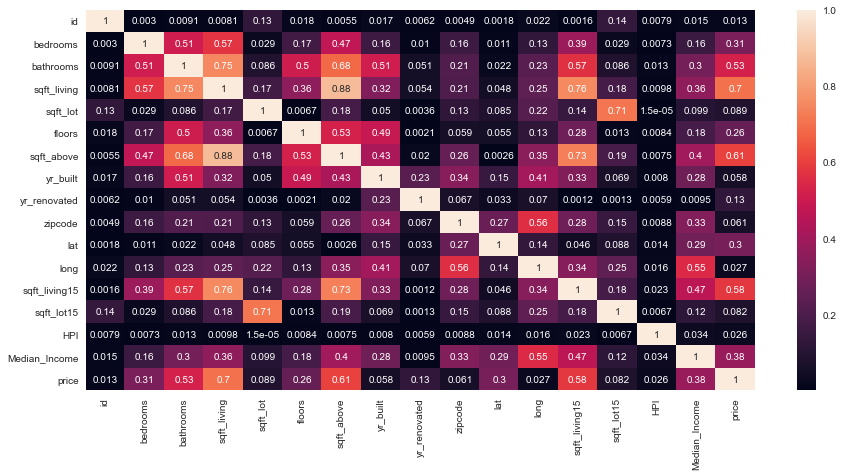

In [87]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(training_data.corr().abs(), annot = True, ax = ax);

<AxesSubplot:>

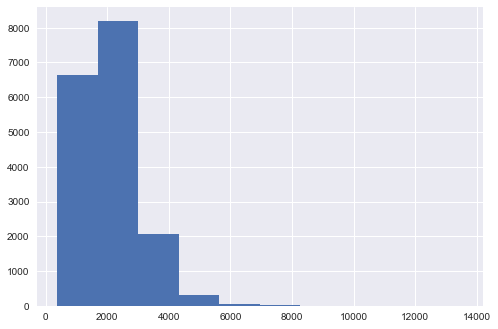

In [52]:
training_data['sqft_living'].hist()

<AxesSubplot:>

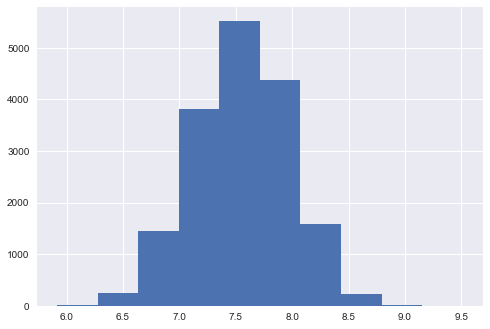

In [53]:
np.log(training_data['sqft_living']).hist()

<AxesSubplot:>

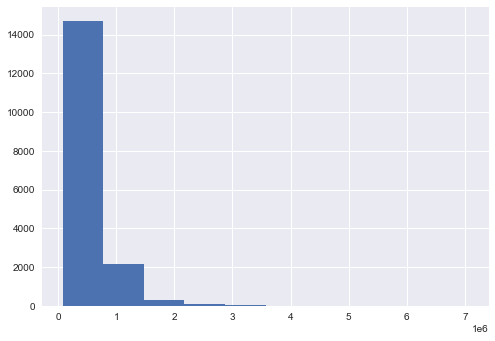

In [54]:
training_data['price'].hist()

<AxesSubplot:>

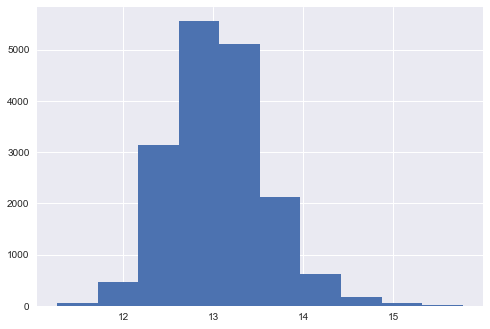

In [55]:
np.log(training_data['price']).hist()

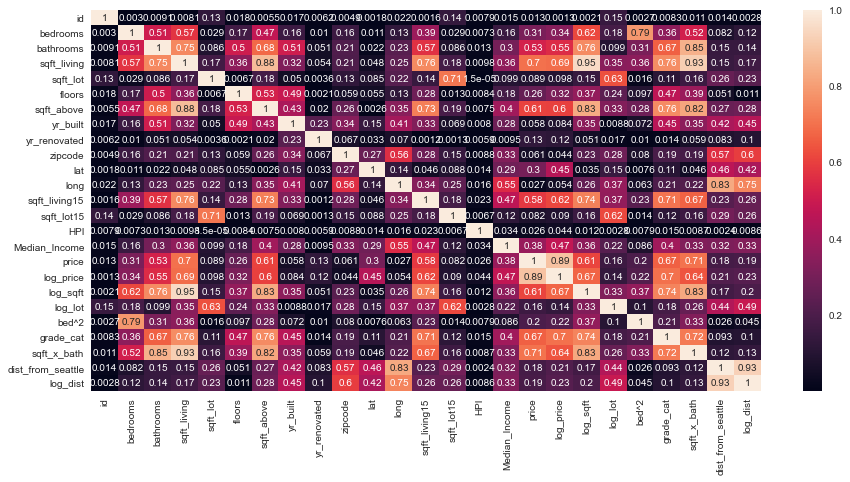

In [89]:
feature_testing = training_data.copy()

fig,ax = plt.subplots(figsize = (15,7))

def custom_transformations(df):
    df['grade_cat'] = df['grade'].str.split().str[0].astype(int)
    df['dist_from_seattle'] = np.sqrt( (df['lat'] - 47.6050) ** 2 + (df['long'] + 122.3344) ** 2)
    df['log_sqft'] = np.log(df['sqft_living'])
    df['log_dist'] = np.log(df['dist_from_seattle'])
#log X,y
feature_testing['log_price'] = np.log(feature_testing['price'])
feature_testing['log_sqft'] = np.log(feature_testing['sqft_living'])
feature_testing['log_lot'] = np.log(feature_testing['sqft_lot'])


feature_testing['bed^2'] = feature_testing['bedrooms'] ** 2
feature_testing['grade_cat'] = feature_testing['grade'].str.split().str[0].astype(int)


feature_testing['sqft_x_bath'] = feature_testing['sqft_living'] * feature_testing['bathrooms']

feature_testing['dist_from_seattle'] = np.sqrt( (feature_testing['lat'] - 47.6050) ** 2 + (feature_testing['long'] + 122.3344) ** 2)
feature_testing['log_dist'] = np.log(feature_testing['dist_from_seattle'])

ax = sns.heatmap(feature_testing.corr().abs(), annot = True, ax = ax);

In [90]:
pairs_df = feature_testing.drop(columns = 'price', axis = 1).corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['Pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['Pairs'], inplace = True)
pairs_df.drop(columns = ['level_0', 'level_1'], inplace = True)
pairs_df.columns = ['CC']
pairs_df.drop_duplicates(inplace = True)
pairs_df[(pairs_df.CC > 0.6) & (pairs_df.CC < 1)]

,CC
Pairs,
"(log_sqft, sqft_living)",0.954321
"(dist_from_seattle, log_dist)",0.932592
"(sqft_living, sqft_x_bath)",0.925591
"(sqft_living, sqft_above)",0.877013
"(bathrooms, sqft_x_bath)",0.850449
"(log_sqft, sqft_above)",0.832355
"(dist_from_seattle, long)",0.829946
"(log_sqft, sqft_x_bath)",0.827305
"(sqft_x_bath, sqft_above)",0.821442


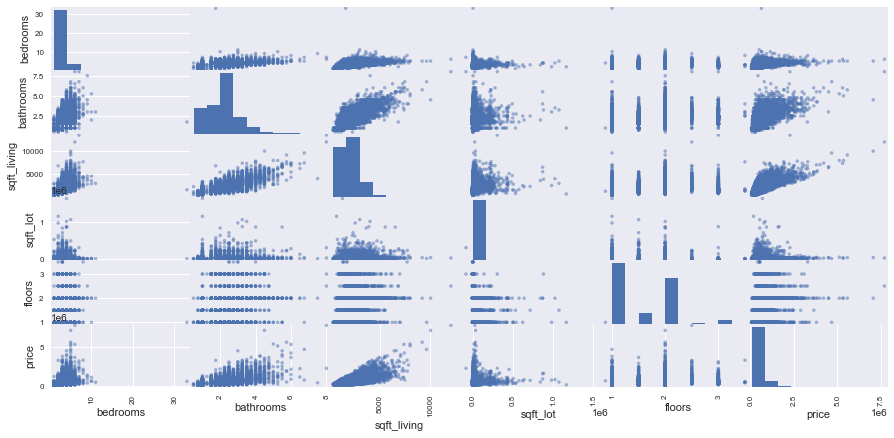

In [91]:
pd.plotting.scatter_matrix(feature_testing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']], figsize = (15,7));

# Baseline

In [92]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dummy_regr = DummyRegressor(strategy="mean")

X = training_data['bathrooms'].values.reshape(-1,1)
y = y_train

dummy_regr.fit(X, y)
print(dummy_regr.score(X, y))

predicted_y = dummy_regr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.0
367045.729093643


# Sqft only

In [93]:
X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4937515248112204
261157.22130882496


In [94]:
import statsmodels.api as sm

X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

results = sm.OLS(y, sm.add_constant(X)).fit()

results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:18:21   Log-Likelihood:            -2.4001e+05
No. Observations:               17277   AIC:                         4.800e+05
Df Residuals:                   17275   BIC:                         4.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.379e+04   4913.241     -8.913      0.000   -5.34e+04   -3.42e+04
x1           280.7656      2.163    129.802      0.000     276.526     285.005
==============================================================================
Omnibus:                    11793.853   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           425733.786
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      26.663   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
X = training_data[['sqft_living','bathrooms']]
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.493776715349016
261150.72373597676


# Log sqft (worse)

In [96]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.37497946909750846
290179.8933499167


# Log price (worse)

In [97]:
X = feature_testing['sqft_living'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.48294852150243683
0.3784082207925928


# Log sqft log price (worse)

In [98]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.45526136190520816
0.38840763732427197


# Sqft X Bath (better)

In [99]:
X = feature_testing['sqft_x_bath'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

print(np.linalg.cond(X))

0.4993252447210761
259715.59134249398
1.0


# Bed ^2 (worse)

In [100]:
from sklearn.preprocessing import PolynomialFeatures

X = feature_testing['bedrooms'].values.reshape(-1,1)
y = feature_testing['price']

poly = PolynomialFeatures(2)
poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.0959558220453729
348991.62247501325


# sqft X bath + log_lot (slightly better)

In [101]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train



lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4999043573180957
259565.3460124953


# Polynomial

In [102]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train

new_x = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(new_x, y)

print(lr.score(new_x,y))

predicted_y = lr.predict(new_x)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.5020511447040646
259007.6217847992


# Distance from seattle added to polynomial

R^2:  0.8039116026214299
Adjusted R^2 : 0.8029535159892871
Median Absolute Error: 65543.48990293592
RMSE:  162534.71106804244
Median Error:  13383.839545231313


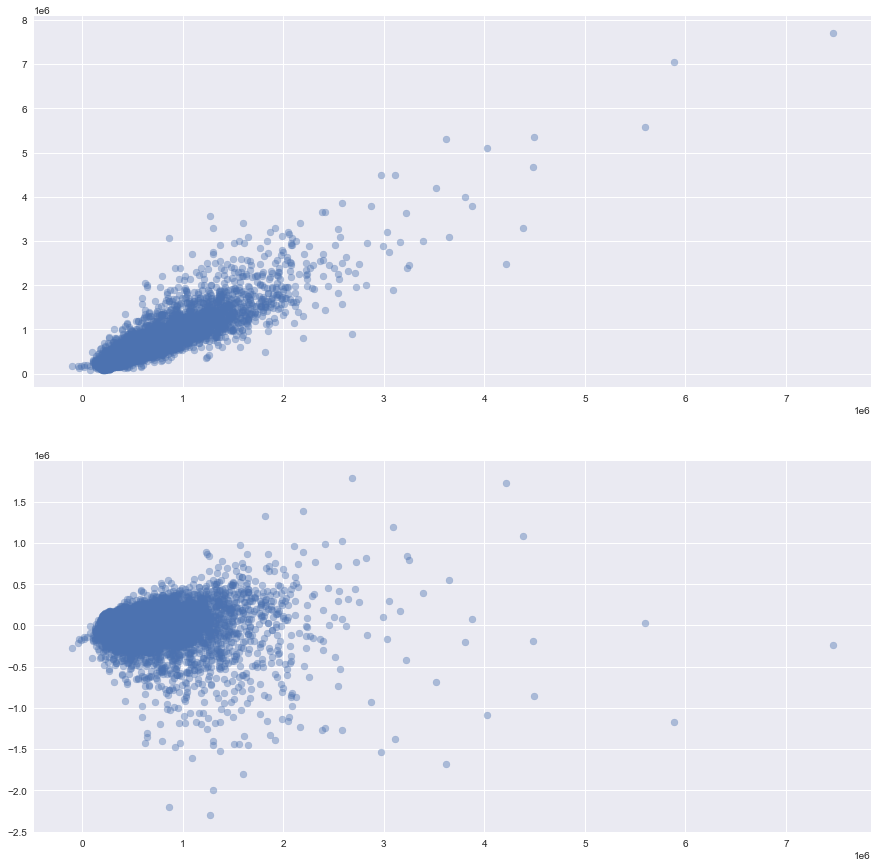

In [155]:
X = feature_testing[['sqft_living','bathrooms','dist_from_seattle','yr_built','grade_cat','Median_Income']]
y = y_train

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))
predicted_y = lr.predict(X)

med_ae = median_absolute_error(y,predicted_y)
print('Median Absolute Error:',med_ae)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

#print(np.linalg.cond(X))

fig, axs = plt.subplots(2, figsize = (15,15));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

# Tried OHE with waterfront

In [135]:
"""from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse = False)
cat_X = ohe.fit_transform(feature_testing['waterfront'].values.reshape(-1,1))
cat_df = pd.DataFrame(data = cat_X)
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']].copy()
X['waterfront'] = cat_df.values
y = y_train



#poly = PolynomialFeatures(3)
#X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)"""

"from sklearn.preprocessing import OneHotEncoder\n\nohe = OneHotEncoder(drop = 'first', sparse = False)\ncat_X = ohe.fit_transform(feature_testing['waterfront'].values.reshape(-1,1))\ncat_df = pd.DataFrame(data = cat_X)\nX = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']].copy()\nX['waterfront'] = cat_df.values\ny = y_train\n\n\n\n#poly = PolynomialFeatures(3)\n#X = poly.fit_transform(X)\n\nlr = LinearRegression()\nlr.fit(X, y)\n\nprint(lr.score(X,y))\n\npredicted_y = lr.predict(X)\n\nrmse = np.sqrt(mean_squared_error(predicted_y,y))\nprint(rmse)"

# Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

x_enc = feature_testing['grade']

x_enc = x_enc.str.split().str[0]

enc = OrdinalEncoder()

test = enc.fit_transform(X)


# Adding Median Income

R^2:  0.7644483499702623
Adjusted R^2 : 0.7632974461427555
Median Absolute Error: 67808.09600348232
RMSE:  188543.1048455411
Condition Number:  4.6049140676685785e+20


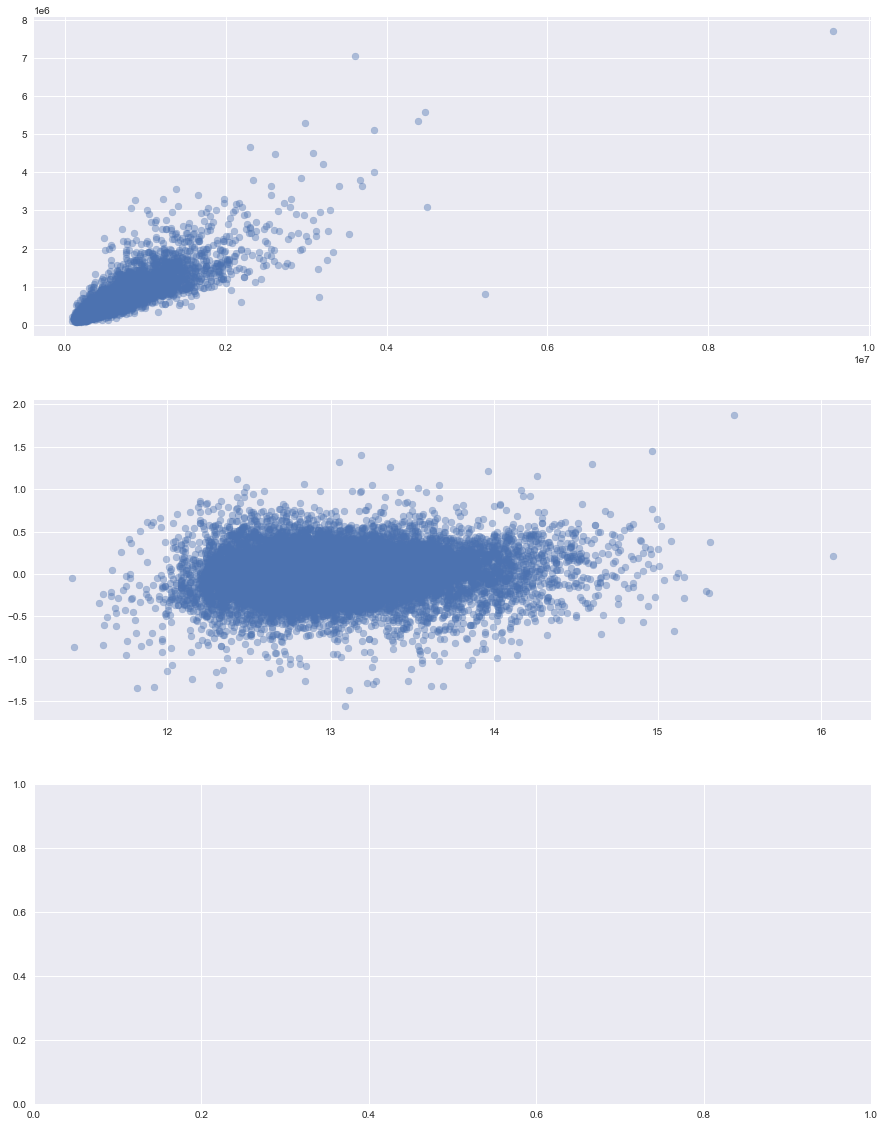

In [156]:
X = feature_testing[['log_sqft','bathrooms','log_dist','yr_built','grade_cat','Median_Income']]

y = pd.Series(np.log(y_train))

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(np.exp(y),np.exp(predicted_y)))

med_ae = median_absolute_error(np.exp(y),np.exp(predicted_y))
print('Median Absolute Error:',med_ae)
print('RMSE: ',rmse)
#print("Median Error: ", np.median(np.exp(predicted_y) - np.exp(y)))

print('Condition Number: ',np.linalg.cond(X))

fig, axs = plt.subplots(3, figsize = (15,20));

axs[0].scatter(np.exp(predicted_y), np.exp(y), alpha = 0.4)
#axs[1].scatter(np.exp(predicted_y), np.exp(predicted_y) - np.exp(y), alpha = 0.4);
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#sns.heatmap(pd.concat([y, X], axis = 1).corr().abs(), annot = True, ax = axs[2]);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)



#print(predicted_y - y)

# Cross-Validations

In [151]:


scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 10)
lr_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
display_scores(lr_scores)

Scores: [0.25227619 0.25758381 0.25940018 0.24139907 0.2595541  0.25796374
 0.26795895 0.25530403 0.25581305 0.25771931]
Mean: 0.25649724196777635
Standard Deviation: 0.006337435898320245


# Test Predictions

In [119]:
custom_transformations(test_data)

In [122]:
X_test_data = test_data[['log_sqft','bathrooms','log_dist','yr_built','grade_cat','Median_Income']]
y_test_data = np.log(y_test)


X_test_data = poly.transform(X_test_data)

test_predictions = lr.predict(X_test_data)
print('Adjusted R^2 :', 1 - ( 1-lr.score(X_test_data, y_test_data) ) * ( len(y_test_data) - 1 ) / ( len(y_test_data) - X_test_data.shape[1] - 1 ))
rmse = np.sqrt(mean_squared_error(test_predictions,y_test_data))
print('RMSE: ',rmse)
print("Median Error: ", np.median(test_predictions - y_test_data))
print('RMSE $:', y_test.std()*rmse)

Adjusted R^2 : 0.7749252319147164
RMSE:  0.24788972274942742
Median Error:  0.00041957391041691494
RMSE $: 91381.27759670935


<AxesSubplot:xlabel='yr_built', ylabel='price'>

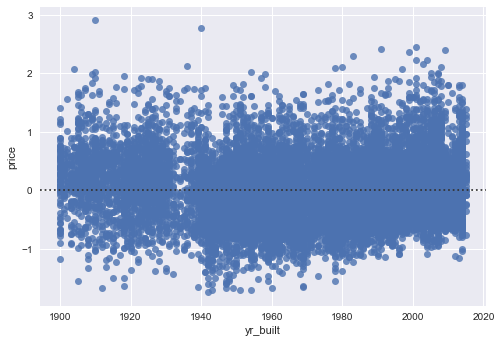

In [108]:
sns.residplot(x=feature_testing['yr_built'], y=np.log(feature_testing['price']))

<AxesSubplot:xlabel='dist_from_seattle', ylabel='price'>

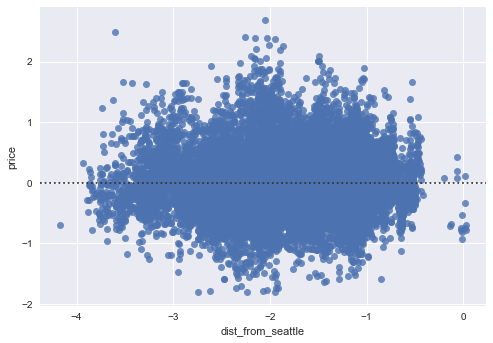

In [109]:
sns.residplot(x=np.log(feature_testing['dist_from_seattle']), y=np.log(feature_testing['price']))